# проверка работоспособности утилит для работы с бимодальной симуляцией

### Always to run stuff

In [37]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/amir/rqc_internship
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join as jn
import os
import yaml
from tqdm.notebook import tqdm

In [39]:
with open('params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)
with open('pathes.yaml') as conf_file:
    path_config = yaml.safe_load(conf_file)

pressure_path = path_config['p_video_path']
signal_path = path_config['s_video_path']


FileNotFoundError: [Errno 2] No such file or directory: 'params.yaml'

In [ ]:
import torch_bimodal_sim_lib as tbsl

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time 

### Клетка для запуска.

## End of always run stuff.
## Beginning of code.

In [ ]:
from simToReal import sim_utils

In [ ]:
with open('params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)

In [ ]:
config['env']['sen_geometry']['n_angles'] = 1
config['env']['sen_geometry']['distance'] = 0.1
config['env']['phys']['sigma'] = 1
config['env']['bimodal']['borning_modes'] = [1, 0]
config['env']['bimodal']['impact_modes'] = [1, 1]
config['env']['bimodal']['period'] = 2.5

In [ ]:
simb = tbsl.FiberSimulator(config)

генерация датасета

In [ ]:
ds_size = 50
dataset = sim_utils.generate_point_dataset(simb.gaus_kernel_size, ds_size, 10, simb.pixel_distance)
assert(dataset.shape[::2] == (ds_size, simb.gaus_kernel_size))

генерация плоского датасета

In [ ]:
ds_size = 50
flat_dataset = sim_utils.generate_flat_dataset(simb.gaus_kernel_size, simb.gaus_sigma_pix, ds_size, 10, simb.pixel_distance)
assert(flat_dataset.shape[::2] == (ds_size, 1))

сравнение датасетов

In [ ]:
dataset.shape, flat_dataset.shape

((50, 114, 61), (50, 114, 1))

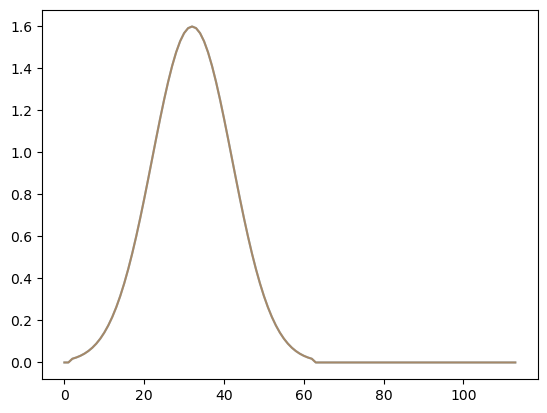

In [ ]:
from torchvision.transforms.functional import gaussian_blur
import torch
blured_dataset = gaussian_blur(torch.from_numpy(dataset[None, 0, ...]), [61, 61], 10)[0]
blured_flat = gaussian_blur(torch.from_numpy(flat_dataset[None, 0, ...]), [1, 61], 10)[0]
plt.plot(blured_dataset[:, 30], alpha=0.8)
plt.plot(blured_flat[:, 0], alpha=0.5)
# проверить, что разные симуляции дают одинаковые синусоиды. 

генерация синусоид

In [ ]:
sinus_sim = sim_utils.SinusSimulator(config, tbsl.FiberSimulator)

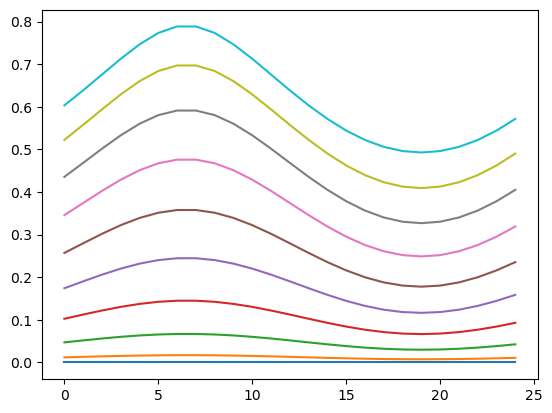

In [ ]:
N = 10
forces = np.linspace(0, 14, N)
sinuses = sinus_sim.generate_sinuses([[0.5, 0], 
                                      [0.5, 0.5]], forces)

for sinus in sinuses:
    plt.plot(sinus)

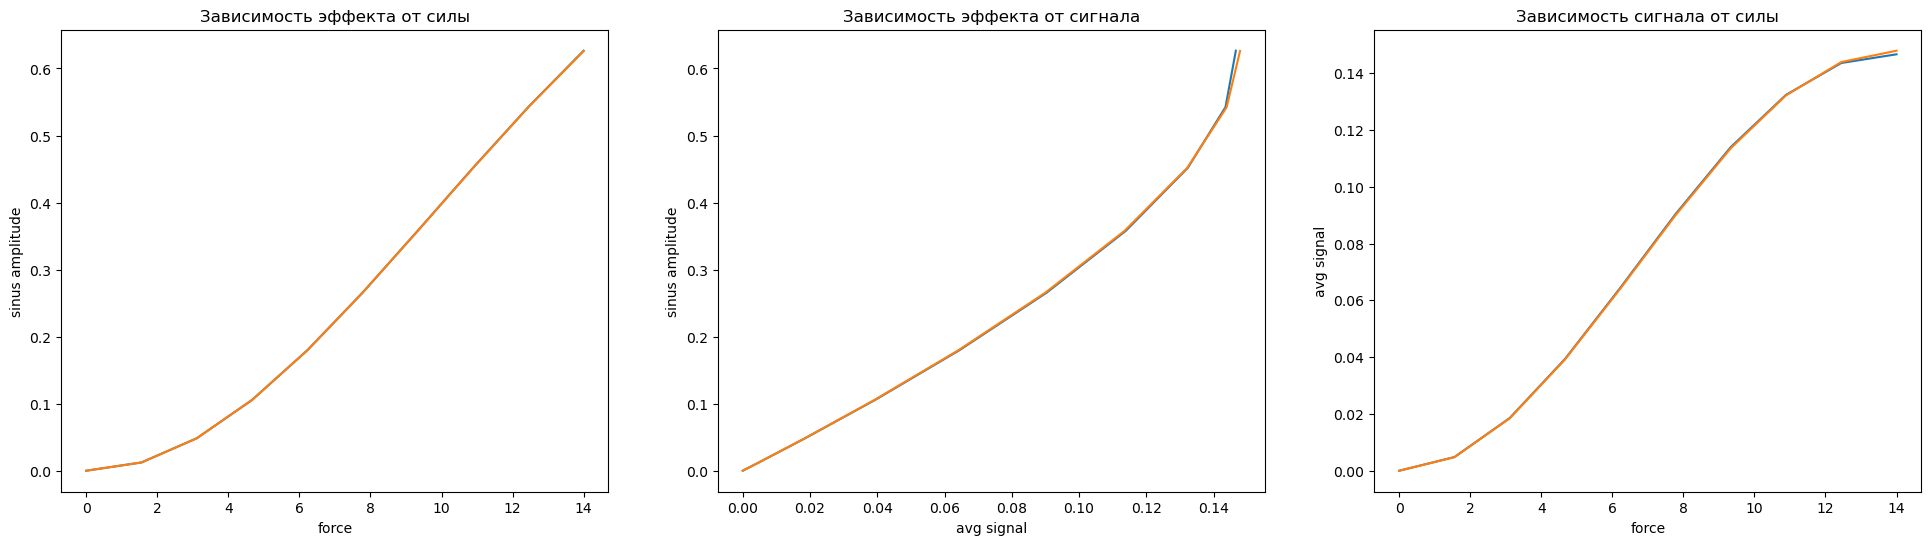

In [ ]:
sinus_ampl, avg_signal = sim_utils.approx_sinuses(sinuses)
plt.figure(figsize=(24, 6))

plt.subplot(1, 3, 1)
plt.plot(forces, sinus_ampl)
plt.xlabel("force")
plt.ylabel("sinus amplitude")
plt.title("Зависимость эффекта от силы")

plt.subplot(1, 3, 2)
plt.plot(avg_signal, sinus_ampl)
plt.xlabel("avg signal")
plt.ylabel("sinus amplitude")
plt.title("Зависимость эффекта от сигнала")

plt.subplot(1, 3, 3)
plt.plot(forces, avg_signal)
plt.xlabel("force")
plt.ylabel("avg signal")
plt.title("Зависимость сигнала от силы")

sinus_ampl, avg_signal = sim_utils.simple_approx_sinuses(sinuses)

plt.subplot(1, 3, 1)
plt.plot(forces, sinus_ampl)
plt.subplot(1, 3, 2)
plt.plot(avg_signal, sinus_ampl)
plt.subplot(1, 3, 3)
plt.plot(forces, avg_signal)


sinus_ampl, avg_signal = sinus_sim.generate_charact_curves([[0.5, 0], 
                                                            [0.5, 0.5]], forces)

plt.subplot(1, 3, 1)
plt.plot(forces, sinus_ampl)
plt.subplot(1, 3, 2)
plt.plot(avg_signal, sinus_ampl)
plt.subplot(1, 3, 3)
plt.plot(forces, avg_signal)
